Given a pendulum of length L with initial position given by some $\theta$ measured from the negative vertical to the positive horizontal we have that:

$$\begin{align} \frac{d^2\theta}{dt^2} &= -\frac{g}{L}\sin (\theta) \\ \\
\frac{d\theta}{dt} &= \omega
\end{align}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

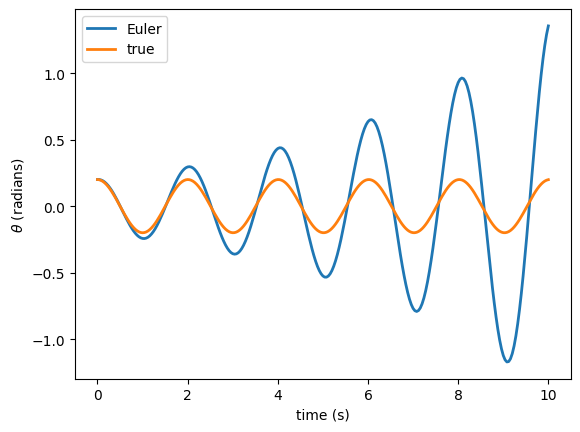

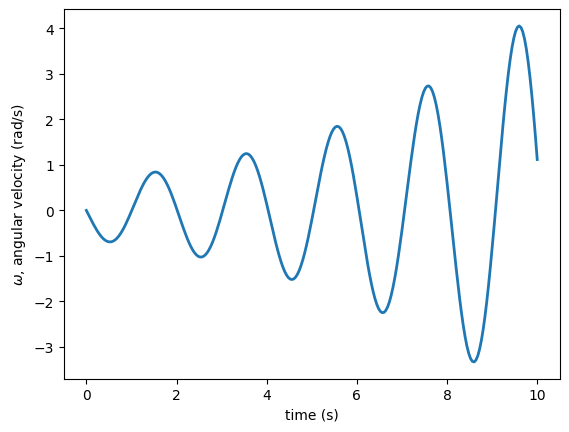

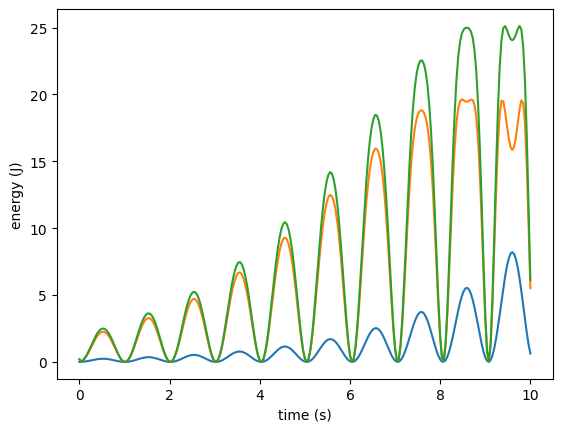

In [11]:
l=1
g = 9.81
m = 1
def truethetaoft(t):
    th0=0.2
    k=math.sqrt(g/l)
    return th0*math.cos(k*t)

#define initial conditions and constants
theta0=0.2
omega0=0
t0=0
tf=10

# choose step size
h=0.04
n=int((tf-t0)/h)

thetaold=theta0
omegaold=omega0
vel_old=l*omegaold
height_old= 1 - l*math.cos(thetaold)
thetanew=0
omeganew=0
tpoints=np.linspace(t0,tf,n+1)
thetapoints=[]
omegapoints=[]
VEL=[]
HEIGHT=[]
for t in tpoints:
    thetapoints.append(thetaold)
    omegapoints.append(omegaold)
    VEL.append(vel_old)
    HEIGHT.append(height_old)

    omeganew = omegaold - h*(g/l)*thetaold
    thetanew = thetaold + h*omegaold
    vel_new = l*omeganew
    height_new = 1 - l*math.cos(omeganew)

    omegaold=omeganew
    thetaold=thetanew
    vel_old = vel_new
    height_old = height_new

KE = [1/2*m*v**2 for v in VEL]
PE = [m*g*h for h in HEIGHT]
ME = [k + u for k,u in zip(KE, PE)]

plt.figure(1)
plt.plot(tpoints,thetapoints,lw=2, label="Euler")
truepoints=list(map(truethetaoft,tpoints))
plt.plot(tpoints,truepoints,lw=2,label="true")
plt.xlabel("time (s)")
plt.ylabel(r'$\theta$ (radians)')
plt.legend()
plt.figure(2)
plt.plot(tpoints,omegapoints,lw=2)
plt.xlabel("time (s)")
plt.ylabel(r'$\omega$, angular velocity (rad/s)')


plt.figure(3)
plt.plot(tpoints, KE)
plt.plot(tpoints, PE)
plt.plot(tpoints, ME)
plt.xlabel('time (s)')
plt.ylabel('energy (J)')
plt.savefig('Energy Plot with Euler Method.png')
#draw
plt.show()


RK4 Method:

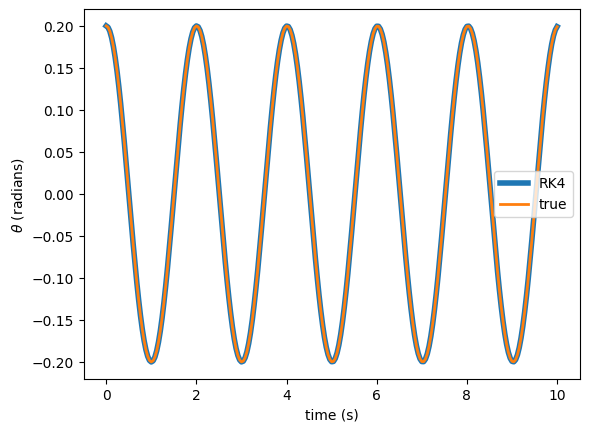

In [12]:
l=1
g = 9.81
def f(r,t):
    theta=r[0]
    omega=r[1]
    ftheta=omega
    fomega=-(g/l)*theta
    return np.array([ftheta,fomega],float)

def truethetaoft(t):
    th0=0.2
    k=math.sqrt(g/l)
    return th0*math.cos(k*t)

#define initial conditions and constants
theta0=0.2
omega0=0
t0=0
tf=10

# choose step size
h=0.04
n=int((tf-t0)/h)
tpoints=np.linspace(t0,tf,n+1)
thetapoints=[]
omegapoints=[]
r=np.array([theta0,omega0],float)

for t in tpoints:
    thetapoints.append(r[0])
    omegapoints.append(r[1])
    k1=h*f(r,t)
    k2=h*f(r+k1/2,t+h/2)
    k3=h*f(r+k2/2,t+h/2)
    k4=h*f(r+k3,t+h)
    r += (1/6)*(k1+2*k2+2*k3+k4)

plt.plot(tpoints,thetapoints,lw=4, label="RK4")

truepoints=list(map(truethetaoft,tpoints))
plt.plot(tpoints,truepoints,lw=2,label="true")

plt.xlabel("time (s)")
plt.ylabel(r'$\theta$ (radians)')
plt.legend()

#draw
plt.show()


Non-linear pendulum (added friction):

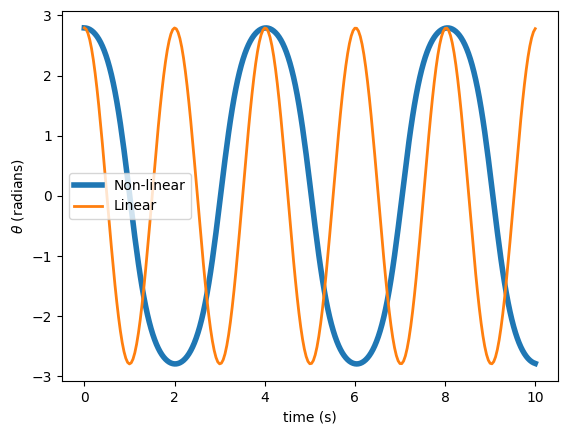

In [13]:
#define initial conditions and constants
#theta0=0.2
theta0=math.radians(160)
omega0=0
t0=0
tf=10
l=1
g = 9.81

def f(r,t):
    theta=r[0]
    omega=r[1]
    ftheta=omega
    fomega=-(g/l)*math.sin(theta)
    return np.array([ftheta,fomega],float)

def simpletheta(t):
    k=math.sqrt(g/l)
    return theta0*math.cos(k*t)

# choose step size
h=0.04
n=int((tf-t0)/h)

tpoints=np.linspace(t0,tf,n+1)
thetapoints=[]
omegapoints=[]
r=np.array([theta0,omega0],float)
for t in tpoints:
    thetapoints.append(r[0])
    omegapoints.append(r[1])
    k1=h*f(r,t)
    k2=h*f(r+k1/2,t+h/2)
    k3=h*f(r+k2/2,t+h/2)
    k4=h*f(r+k3,t+h)
    r += (1/6)*(k1+2*k2+2*k3+k4)
plt.plot(tpoints,thetapoints,lw=4, label="Non-linear")

simplepoints=list(map(simpletheta,tpoints))
plt.plot(tpoints,simplepoints,lw=2,label="Linear")

plt.xlabel("time (s)")
plt.ylabel(r'$\theta$ (radians)')
plt.legend()

#draw
plt.show()

Damped Non-Linear Pendulum:

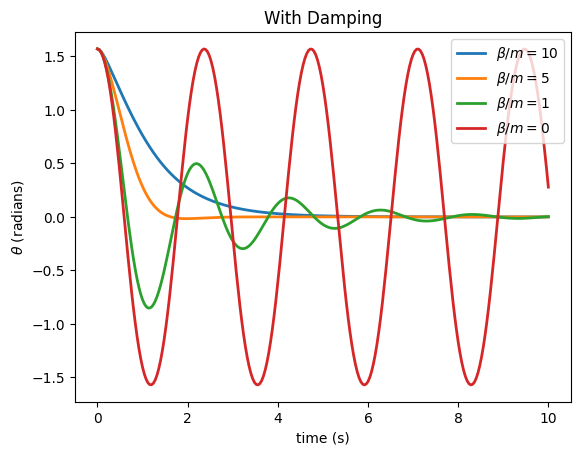

In [14]:
#define initial conditions and constants
theta0=math.radians(90)
omega0=0
t0=0
tf=10
l=1
g = 9.81
BetaOverM = [10,5,1,0]
lb = [r'$\beta/m=10$',r'$\beta/m=5$',r'$\beta/m=1$',r'$\beta/m=0$']

def f(r,t,bom):
    theta=r[0]
    omega=r[1]
    ftheta=omega
    fomega=-(g/l)*math.sin(theta) - bom*omega
    return np.array([ftheta,fomega],float)

# choose step size
h=0.04
n=int((tf-t0)/h)

tpoints=np.linspace(t0,tf,n+1)
for i in range(len(BetaOverM)):
    thetapoints=[]
    omegapoints=[]
    r=np.array([theta0,omega0],float)
    for t in tpoints:
        thetapoints.append(r[0])
        omegapoints.append(r[1])
        k1=h*f(r,t,BetaOverM[i])
        k2=h*f(r+k1/2,t+h/2,BetaOverM[i])
        k3=h*f(r+k2/2,t+h/2,BetaOverM[i])
        k4=h*f(r+k3,t+h,BetaOverM[i])
        r += (1/6)*(k1+2*k2+2*k3+k4)
    plt.plot(tpoints,thetapoints,lw=2,label=lb[i])

plt.xlabel("time (s)")
plt.ylabel(r'$\theta$ (radians)')
plt.title("With Damping")
plt.legend()

#draw
plt.show()


Driving Force Pendulum:

Natural frequency, k =  3.132091952673165
Amplitude at resonance:  0.536534125172869


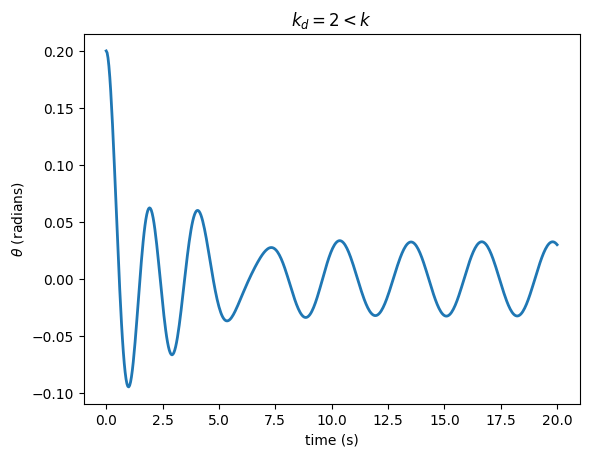

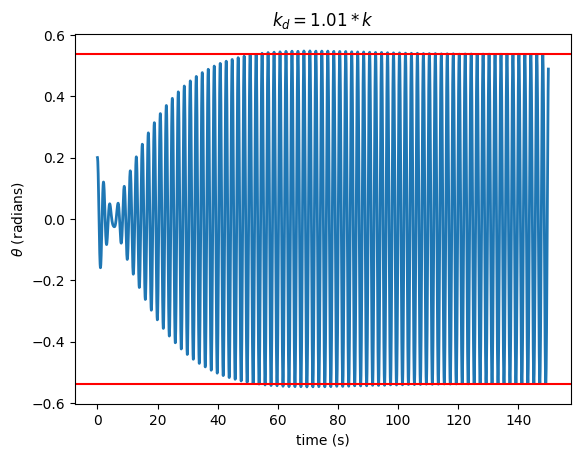

In [15]:
#define initial conditions and constants
theta0=0.200
omega0=0
t0=0
tf=[20,150]
l=1
g = 9.81
BetaOverM = [1,0.1]
F0overlm = 0.2
k=math.sqrt(g/l)
print("Natural frequency, k = ",k)
kd=[2,k*1.01]
lb = [r'$k_d=2<k$',r'$k_d=1.01*k$']
amp=F0overlm/math.sqrt((k**2-kd[1]**2)**2 + (BetaOverM[1]*kd[1])**2)
print("Amplitude at resonance: ",amp)

def f(r,t,od,bom):
    theta=r[0]
    omega=r[1]
    ftheta=omega
    fomega=F0overlm*math.sin(od*t)-(g/l)*theta - bom*omega
    return np.array([ftheta,fomega],float)

# choose step size
h=0.04

for i in range(len(kd)):
    n=int((tf[i]-t0)/h)
    tpoints=np.linspace(t0,tf[i],n+1)
    thetapoints=[]
    omegapoints=[]
    r=np.array([theta0,omega0],float)
    for t in tpoints:
        thetapoints.append(r[0])
        omegapoints.append(r[1])
        k1=h*f(r,t,kd[i],BetaOverM[i])
        k2=h*f(r+k1/2,t+h/2,kd[i],BetaOverM[i])
        k3=h*f(r+k2/2,t+h/2,kd[i],BetaOverM[i])
        k4=h*f(r+k3,t+h,kd[i],BetaOverM[i])
        r += (1/6)*(k1+2*k2+2*k3+k4)
    plt.figure(i+1)
    plt.plot(tpoints,thetapoints,lw=2)
    plt.xlabel("time (s)")
    plt.ylabel(r'$\theta$ (radians)')
    plt.title(lb[i])
    if i==1:
        plt.axhline(y=amp,color="red")
        plt.axhline(y=-amp,color="red")



#draw
plt.show()

Nonlinear Pendulum with Driving Force:

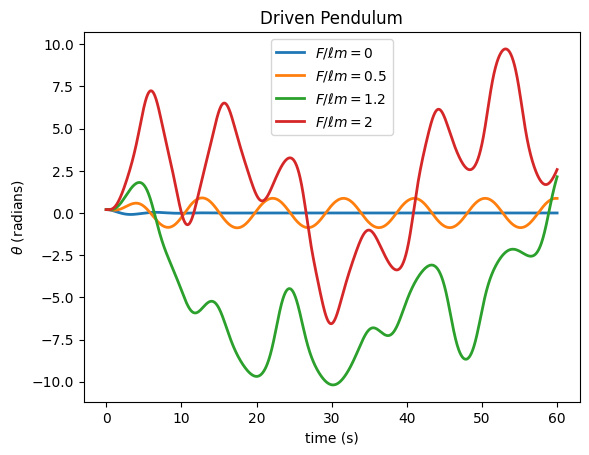

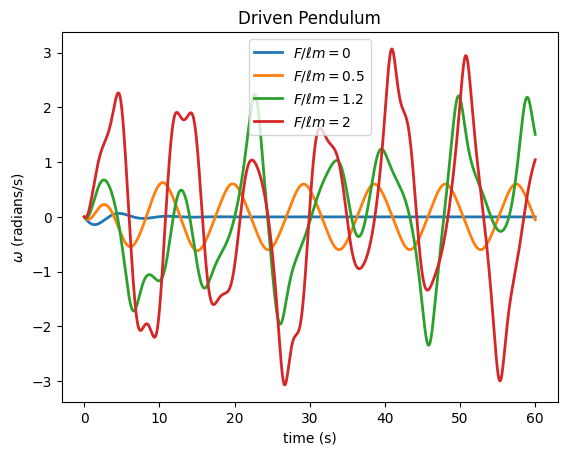

In [16]:
#define initial conditions and constants
theta0=0.200
omega0=0
t0=0
tf=60
l=9.81
g = 9.81
BetaOverM = 0.5
F0overlm = [0,0.5,1.2,2]
kd=2/3
lb = [r'$F/\ell m=0$',r'$F/\ell m=0.5$',r'$F/\ell m=1.2$',r'$F/\ell m=2$']

def f(r,t,fom):
    theta=r[0]
    omega=r[1]
    ftheta=omega
    fomega=fom*math.sin(kd*t)-(g/l)*math.sin(theta) - BetaOverM*omega
    return np.array([ftheta,fomega],float)

# choose step size
h=0.04
n=int((tf-t0)/h)

tpoints=np.linspace(t0,tf,n+1)
for i in range(len(F0overlm)):
    thetapoints=[]
    omegapoints=[]
    r=np.array([theta0,omega0],float)
    for t in tpoints:
        thetapoints.append(r[0])
        omegapoints.append(r[1])
        k1=h*f(r,t,F0overlm[i])
        k2=h*f(r+k1/2,t+h/2,F0overlm[i])
        k3=h*f(r+k2/2,t+h/2,F0overlm[i])
        k4=h*f(r+k3,t+h,F0overlm[i])
        r += (1/6)*(k1+2*k2+2*k3+k4)
    plt.figure(1)
    plt.plot(tpoints,thetapoints,lw=2,label=lb[i])
    plt.figure(2)
    plt.plot(tpoints,omegapoints,lw=2,label=lb[i])

plt.figure(1)
plt.xlabel("time (s)")
plt.ylabel(r'$\theta$ (radians)')
plt.title("Driven Pendulum")
plt.legend()

plt.figure(2)
plt.xlabel("time (s)")
plt.ylabel(r'$\omega$ (radians/s)')
plt.title("Driven Pendulum")
plt.legend()

#draw
plt.show()

Phase Space Diagrams:

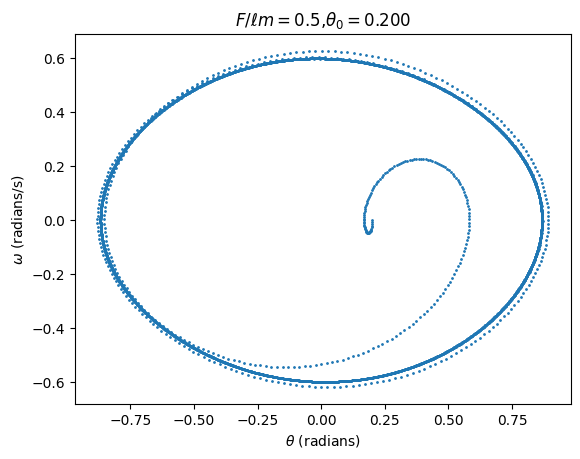

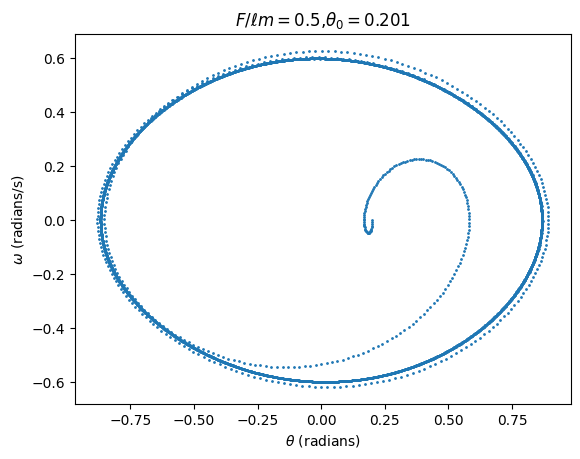

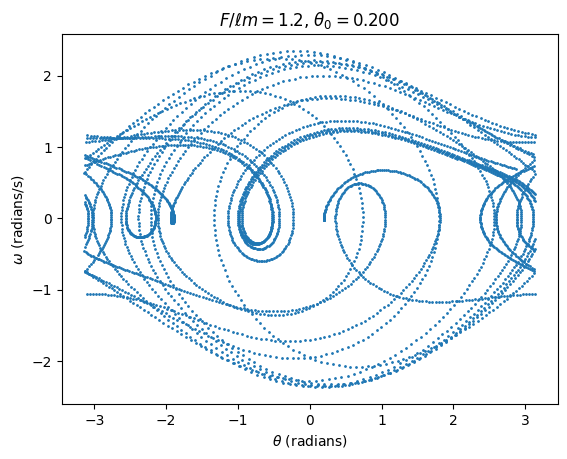

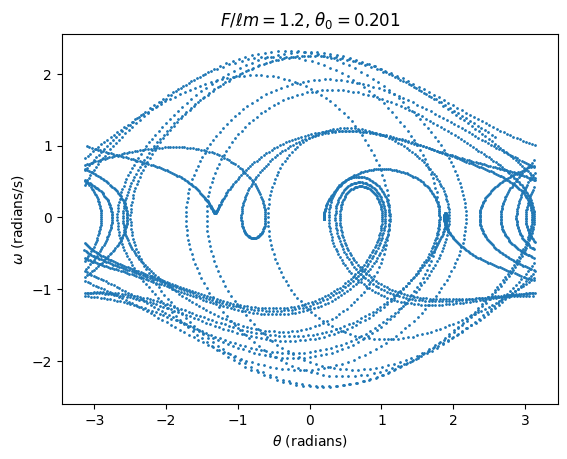

In [17]:
#define initial conditions and constants
theta0=[0.200,0.201]
omega0=0
t0=0
tf=155
l=9.81
g = 9.81
BetaOverM = 0.5
F0overlm = [0.5,1.2]
kd=2/3
lb = [[r'$F/\ell m=0.5$,$\theta_0=0.200$',r'$F/\ell m=0.5$,$\theta_0=0.201$'],[r'$F/\ell m=1.2$, $\theta_0=0.200$',r'$F/\ell m=1.2$, $\theta_0=0.201$']]

def f(r,t,fom):
    theta=r[0]
    omega=r[1]
    ftheta=omega
    fomega=fom*math.sin(kd*t)-(g/l)*math.sin(theta) - BetaOverM*omega
    return np.array([ftheta,fomega],float)

# choose step size
h=0.04
n=int((tf-t0)/h)

figcount=1
tpoints=np.linspace(t0,tf,n+1)
for i in range(len(F0overlm)):
    for j in range(len(theta0)):
        thetapoints=[]
        omegapoints=[]
        r=np.array([theta0[j],omega0],float)
        for t in tpoints:
            thetapoints.append(r[0])
            omegapoints.append(r[1])
            k1=h*f(r,t,F0overlm[i])
            k2=h*f(r+k1/2,t+h/2,F0overlm[i])
            k3=h*f(r+k2/2,t+h/2,F0overlm[i])
            k4=h*f(r+k3,t+h,F0overlm[i])
            r += (1/6)*(k1+2*k2+2*k3+k4)
            if r[0]<-math.pi:
                r[0]+=2*math.pi
            if r[0]>math.pi:
               r[0]-=2*math.pi 
        plt.figure(figcount)
        plt.plot(thetapoints,omegapoints,lw=0,marker="o",markersize=1)
        plt.xlabel(r'$\theta$ (radians)')
        plt.ylabel(r'$\omega$ (radians/s)')
        plt.title(lb[i][j])
        figcount+=1

#draw
plt.show()

Attractor.py

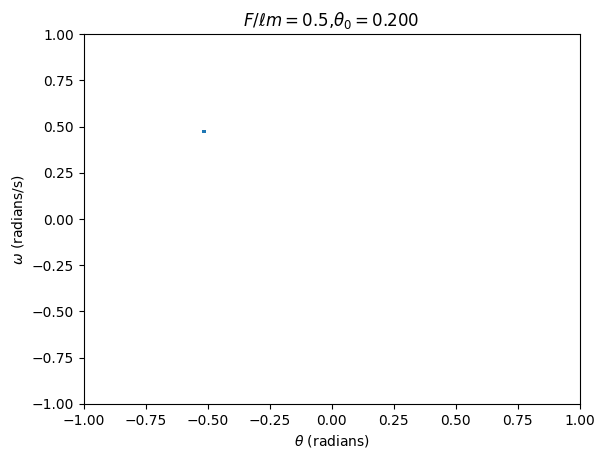

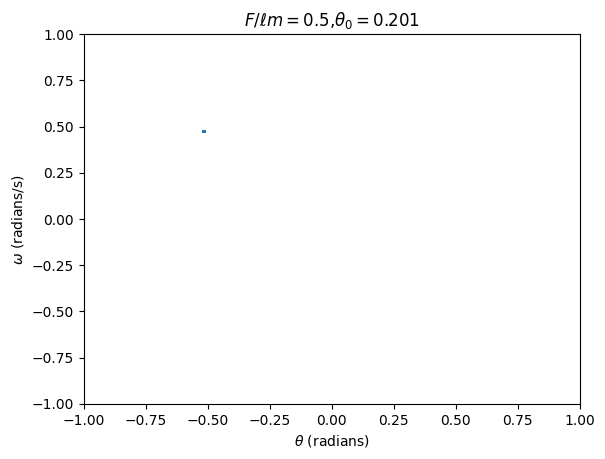

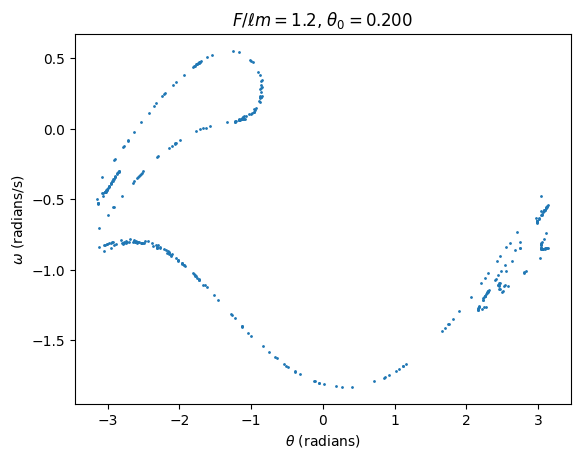

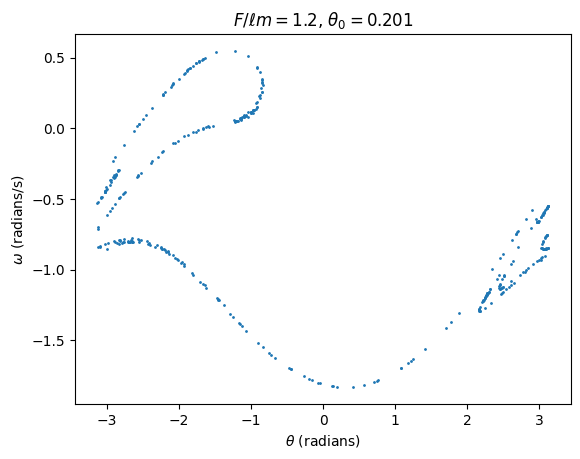

In [18]:
#define initial conditions and constants
theta0=[0.200,0.201]
omega0=0
t0=0
tf=15000
l=9.81
g = 9.81
BetaOverM = 0.5
F0overlm = [0.5,1.2]
kd=2/3
lb = [[r'$F/\ell m=0.5$,$\theta_0=0.200$',r'$F/\ell m=0.5$,$\theta_0=0.201$'],[r'$F/\ell m=1.2$, $\theta_0=0.200$',r'$F/\ell m=1.2$, $\theta_0=0.201$']]

def f(r,t,fom):
    theta=r[0]
    omega=r[1]
    ftheta=omega
    fomega=fom*math.sin(kd*t)-(g/l)*math.sin(theta) - BetaOverM*omega
    return np.array([ftheta,fomega],float)

# choose step size
h=0.04
n=int((tf-t0)/h)
T = 2*math.pi/kd

figcount=1
tpoints=np.linspace(t0,tf,n+1)
for i in range(len(F0overlm)):
    for j in range(len(theta0)):
        thetapoints=[]
        omegapoints=[]
        r=np.array([theta0[j],omega0],float)
        for t in tpoints:
            if t>30:
                m=int(t/T)
                if abs(t-m*T)<0.01:
                    thetapoints.append(r[0])
                    omegapoints.append(r[1])
            k1=h*f(r,t,F0overlm[i])
            k2=h*f(r+k1/2,t+h/2,F0overlm[i])
            k3=h*f(r+k2/2,t+h/2,F0overlm[i])
            k4=h*f(r+k3,t+h,F0overlm[i])
            r += (1/6)*(k1+2*k2+2*k3+k4)
            if r[0]<-math.pi:
                r[0]+=2*math.pi
            if r[0]>math.pi:
               r[0]-=2*math.pi 
        plt.figure(figcount)
        plt.plot(thetapoints,omegapoints,lw=0,marker="o",markersize=1)
        plt.xlabel(r'$\theta$ (radians)')
        plt.ylabel(r'$\omega$ (radians/s)')
        plt.title(lb[i][j])
        if figcount==1 or figcount==2:
            plt.xlim(-1,1)
            plt.ylim(-1,1)
        figcount+=1

#draw
plt.show()